 ### **Ridge Regression:**
- we need to lower the slop of the line to get the best fit line .
- we do it by adding lamdba(m)^2 to the loss function 


- more and more i increase the value of lamdba/alpha ,it decreases the slope 

## ridge regression for 2D data 

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
X , y = make_regression(n_samples=100 , n_features = 1, n_informative=1,n_targets=1,noise = 20 , random_state=13)

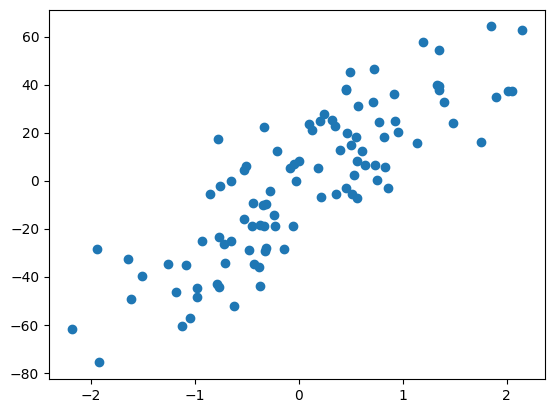

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression


In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
from sklearn.linear_model import Ridge

In [7]:
rr  = Ridge(alpha=10)  # alpha is over lambda 
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [8]:
# model underfit
rr1 = Ridge(alpha= 100)  
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


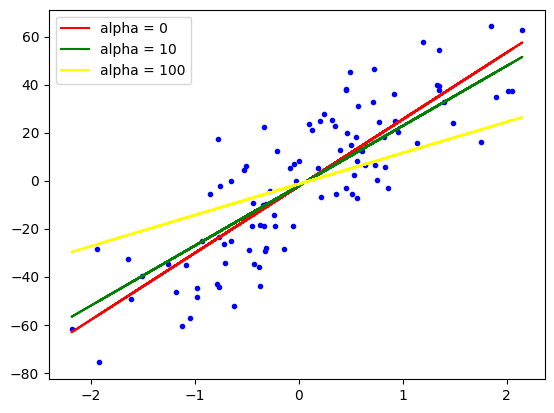

In [9]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha = 0') # if lambda is 0 it perform similar to the linear regression 
plt.plot(X,rr.predict(X),color='green',label='alpha = 10')
plt.plot(X,rr1.predict(X),color='yellow',label='alpha = 100')
plt.legend()

## ridge regression for nD data 

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
import numpy as np

In [12]:
X , y = load_diabetes(return_X_y=True)

In [13]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [14]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state=4)

In [21]:
reg = Ridge(alpha=0.1 , solver = 'cholesky')

In [22]:
reg.fit(X_train,y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'cholesky'
,positive,False
,random_state,None


In [24]:
y_pred1 = reg.predict(X_train)

In [27]:
R2 = r2_score(y_train , y_pred1)
R2

0.5185382012699982

In [28]:
y_pred2 = reg.predict(X_test)
R2 = r2_score(y_test ,y_pred2)
R2

0.4693128853309805

In [29]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


## Ridge regression using graident descent 

In [ ]:
from sklearn.linear_model import SGDRegressor #stoicastic graident descent 

In [88]:
reg = SGDRegressor(penalty='l2',max_iter=500 , eta0=0.1 , learning_rate='constant',alpha=0.001)

In [89]:
reg.fit(X_train , y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,500
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [90]:
y_pred = reg.predict(X_test)

In [91]:
R2 = r2_score(y_test , y_pred)
R2

0.4347444354636476

In [ ]:
# Ridge using inbluild graident descent 
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.001 , max_iter=500 , solver = 'lsqr') # BEST APPROACH !!!

In [93]:
reg.fit(X_train,y_train)

,alpha,0.001
,fit_intercept,True
,copy_X,True
,max_iter,500
,tol,0.0001
,solver,'sparse_cg'
,positive,False
,random_state,None


In [94]:
y_pred = reg.predict(X_test)
print("r2_score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

r2_score 0.46250101619914563
[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466
